In [1]:
# reference: https://networkx.org/documentation/stable/auto_examples/index.html

import pandas as pd
import networkx as nx
import json
import matplotlib.pyplot as plt
from random import sample
import math
import warnings
import matplotlib as mpl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings("ignore") # to ignore warnings regarding special characters in the user name

In [2]:
tweets = pd.read_csv('climatehoax_extended') 
# read downloaded tweets, should be located in the same path as the code (otherwise specify the path)

In [3]:
df = tweets.copy()
df = df.drop(columns=['created_at', 'lang', 'entities', 'media', 'geo']) # remove columns we don't use now
df.head(10)
df

,id,text,author_id,in_reply_to_user_id,author,referenced_tweets
0,1223027619748286464,RT @ThiagoMaia2503: The ice of the Svalbard se...,781531692,NaN,"{""protected"":false,""id"":""781531692"",""url"":"""",""...","[{""type"":""retweeted"",""id"":""1222932034064134145..."
1,1223021903658377216,@mgrant76308 Go back to school is freezing out...,139322897,61851477.0,"{""protected"":false,""id"":""139322897"",""url"":"""",""...","[{""type"":""replied_to"",""id"":""122301755971853517..."
2,1223017455188090881,Remember what is happening behind the curtain:...,1216561117960511491,NaN,"{""protected"":false,""id"":""1216561117960511491"",...",NaN
3,1223014846976757760,"""Global Warming""\n\n🙄\n\n#ClimateChange\n#Clim...",573935794,NaN,"{""protected"":false,""id"":""573935794"",""url"":""htt...","[{""type"":""quoted"",""id"":""1222793555464290304"",""..."
4,1223012516084830208,RT @MannixZegge: Het merk Greta.... Nuff said....,2447038212,NaN,"{""protected"":false,""id"":""2447038212"",""url"":"""",...","[{""type"":""retweeted"",""id"":""1223011624249892864..."
5,1223011624249892864,Het merk Greta.... Nuff said... #ClimateHoax h...,1213922882847293441,NaN,"{""protected"":false,""id"":""1213922882847293441"",...","[{""type"":""quoted"",""id"":""1222791538490650624"",""..."
6,1222997652759109632,RT @deanyb71: @MonikaHeydeck @AndyOldoak It’s ...,258316834,NaN,"{""protected"":false,""id"":""258316834"",""url"":"""",""...","[{""type"":""retweeted"",""id"":""1222994182849036289..."
7,1222997284549537793,"Oh, please give us more of that #ClimateHoax 😤...",486245623,NaN,"{""protected"":false,""id"":""486245623"",""url"":"""",""...","[{""type"":""quoted"",""id"":""1222647500370325506"",""..."
8,1222997108736843776,RT @deanyb71: @MonikaHeydeck @AndyOldoak It’s ...,3070097967,NaN,"{""protected"":false,""id"":""3070097967"",""url"":"""",...","[{""type"":""retweeted"",""id"":""1222994182849036289..."
9,1222996853568024577,@PrisonPlanet Climate Change (man-made) is a c...,495882311,18643437.0,"{""protected"":false,""id"":""495882311"",""url"":"""",""...","[{""type"":""replied_to"",""id"":""122296838227584614..."


,id,text,author_id,in_reply_to_user_id,author,referenced_tweets
0,1223027619748286464,RT @ThiagoMaia2503: The ice of the Svalbard se...,781531692,NaN,"{""protected"":false,""id"":""781531692"",""url"":"""",""...","[{""type"":""retweeted"",""id"":""1222932034064134145..."
1,1223021903658377216,@mgrant76308 Go back to school is freezing out...,139322897,6.185148e+07,"{""protected"":false,""id"":""139322897"",""url"":"""",""...","[{""type"":""replied_to"",""id"":""122301755971853517..."
2,1223017455188090881,Remember what is happening behind the curtain:...,1216561117960511491,NaN,"{""protected"":false,""id"":""1216561117960511491"",...",NaN
3,1223014846976757760,"""Global Warming""\n\n🙄\n\n#ClimateChange\n#Clim...",573935794,NaN,"{""protected"":false,""id"":""573935794"",""url"":""htt...","[{""type"":""quoted"",""id"":""1222793555464290304"",""..."
4,1223012516084830208,RT @MannixZegge: Het merk Greta.... Nuff said....,2447038212,NaN,"{""protected"":false,""id"":""2447038212"",""url"":"""",...","[{""type"":""retweeted"",""id"":""1223011624249892864..."
...,...,...,...,...,...,...
9310,1222898675896082435,@johnshaplin @yanisvaroufakis @ProSyn This fro...,867077976210513920,2.213013e+09,"{""location"":""Always QUESTION "",""url"":"""",""usern...","[{""type"":""replied_to"",""id"":""122269192433694720..."
9311,1222891218226446338,"@jk_eaton No shit, Sherlock. Greta, koalas &am...",867077976210513920,7.596459e+08,"{""location"":""Always QUESTION "",""url"":"""",""usern...","[{""type"":""replied_to"",""id"":""122288953361377280..."
9312,1222889509232267265,Energy and Commerce Chairman Frank Pallone Jr....,75184478,7.518448e+07,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...","[{""type"":""replied_to"",""id"":""122288909340055142..."
9313,1222880284439302144,Are you one of the #UNEP's 50 million #climate...,1179690892854099973,NaN,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...",NaN


In [4]:
df[df.author_id==867077976210513920].text # looking at the user 'voice of insane'

16      @DukeMarcude @GeraldKutney Ask him about eatin...
24      @GZzyzyx @GeraldKutney Dear Genie... 😂 The #cl...
25      @inmyownfashion @GeraldKutney In fact, that is...
26      @SNISGeneva @ETH_en WHAT? 😂 😂 😂 you are discus...
27      @CSRtist Are your fancy eyewear included in th...
                              ...                        
9305    @GeraldKutney This is the proof that  #climate...
9306    @GrannyRevHub GHG are not a problem. The GHE i...
9310    @johnshaplin @yanisvaroufakis @ProSyn This fro...
9311    @jk_eaton No shit, Sherlock. Greta, koalas &am...
9314    @GeraldKutney @EdBohman Is freezing winter wha...
Name: text, Length: 625, dtype: object

In [5]:
def create_network(sample_size, seed=7):
    '''
    create network based on the tweets
    sample size: number of tweets you want to sample
    seed: to control random sampling (different seeds result in different random sampling)
    '''
    g = nx.DiGraph() # create directed graph in networkx
    df_small = df.sample(sample_size, random_state=seed)
    
    weights = dict()
    usernames = dict() # {userid:username, userid2:username..}
    tweet_texts = dict() # {userid:tweet, userid2:tweets..} # TBD: value to list
    
    for col in df_small.itertuples(index = False): # iterate through rows of the dataframe
        author = col.author_id # save author id to the variable 'author'
        author_json = json.loads(col.author) # load json that is saved in the column 'author'
        usernames[author]=author_json['name'] # save key-value pair: key=author id, value=username
        # print(aut['name'])
        #df_small['username'] = author_json['name']
        #print(author_json['name'])
        if author not in tweet_texts.keys():
            tweet_texts[author] = [col.text]
        
        else:
            tweet_texts[author].append(col.text) # save tweet texts for later (not used now)
        reply_to = col.in_reply_to_user_id # save the id from 'in_reply_to_user_id' column to 'reply_to'

        g.add_node(author) # add node with author id 
        # if we move this line into 'if not math.isnan(reply_to), we will only save the nodes that is replying to someone
        # that can be one way of filtering
        
        if author not in weights.keys(): # if this author appeard for the first time, create empty dictionary
            weights[author] = {}
            
        # {author id: {{relyingto1:weight}, author_id2:{}...}
        if not math.isnan(reply_to): 
            # if there is 'in_reply_to_user_id' 
            # the value is nan when the tweet is not replying to anyone
            g.add_node(reply_to) # save the person who is 'replied to' by the tweet we're looking at
            
            if reply_to not in weights[author].keys(): # count how many times this happened between two users
                weights[author][reply_to] = 1
            else:
                weights[author][reply_to] += 1
                
            g.add_edge(author, reply_to, weight=weights[author][reply_to]) # add edge to the network
    
    return g, usernames, tweet_texts, df_small

{1093048489355882497: Text(0.3715607600427102, -0.7509726130205072, 'BlusterPoint'),
 3150800516: Text(-0.8166645755453298, 0.580154038650981, 'JForest'),
 1114252239491805184: Text(-0.898445623552589, 0.041799044997966606, 'stevied'),
 867077976210513920: Text(-0.1386387468875703, -0.1777652116395616, 'Voice Of Insane'),
 26570595: Text(-0.6491894861188021, 0.6361314623157237, 'Riesdv'),
 784826816309501954: Text(0.7811808621104882, -0.45250803237738574, 'JET'),
 382559030: Text(-0.9433455079863984, 0.34189835663939155, 'Yvette Henson🗽'),
 624071090: Text(-0.011551438961054457, -0.949660490262434, '/pol/🇷🇺'),
 259960795: Text(-0.9694866756879557, -0.26119416196544304, 'The Codfather/moistly speaking'),
 151101551: Text(-0.8962996806558118, 0.4252676813801654, 'Ian Braisby'),
 1927978586: Text(-0.9845289317929887, -0.07864885067807034, 'Miracle Man'),
 455349381: Text(-0.3359269746416949, -0.9075023516894218, 'Jim Merkley'),
 1097762760014712832: Text(-0.2710880580073515, -0.8130431592

{(1093048489355882497,
  1.1948045582679613e+18): Text(0.4024278780828944, -0.8165155118664389, '1'),
 (867077976210513920,
  8.670779762105139e+17): Text(-0.1386387468875703, -0.1777652116395616, '1'),
 (867077976210513920,
  17201202.0): Text(0.3802337342769139, 0.04944287102985653, '1'),
 (867077976210513920,
  50293935.0): Text(-0.35983774501477256, -0.4597651122625674, '1'),
 (867077976210513920,
  1.0907397973861171e+18): Text(-0.5449124314822216, -0.17991357040035494, '1'),
 (867077976210513920,
  31361423.0): Text(-0.5385374131301075, -0.27517764074785467, '1'),
 (867077976210513920,
  759645884.0): Text(-0.49387415842224225, -0.3973714630985424, '1'),
 (867077976210513920,
  46086956.0): Text(0.3541587537867623, 0.018390413155668486, '1'),
 (2165541865, 39344374.0): Text(-0.04259312099704793, 0.8888776571657575, '1'),
 (219178854, 14662354.0): Text(0.584310722037946, 0.6868743597910743, '1'),
 (293455806, 254515782.0): Text(-0.12312179861901744, 0.8509466142153288, '1'),
 (824

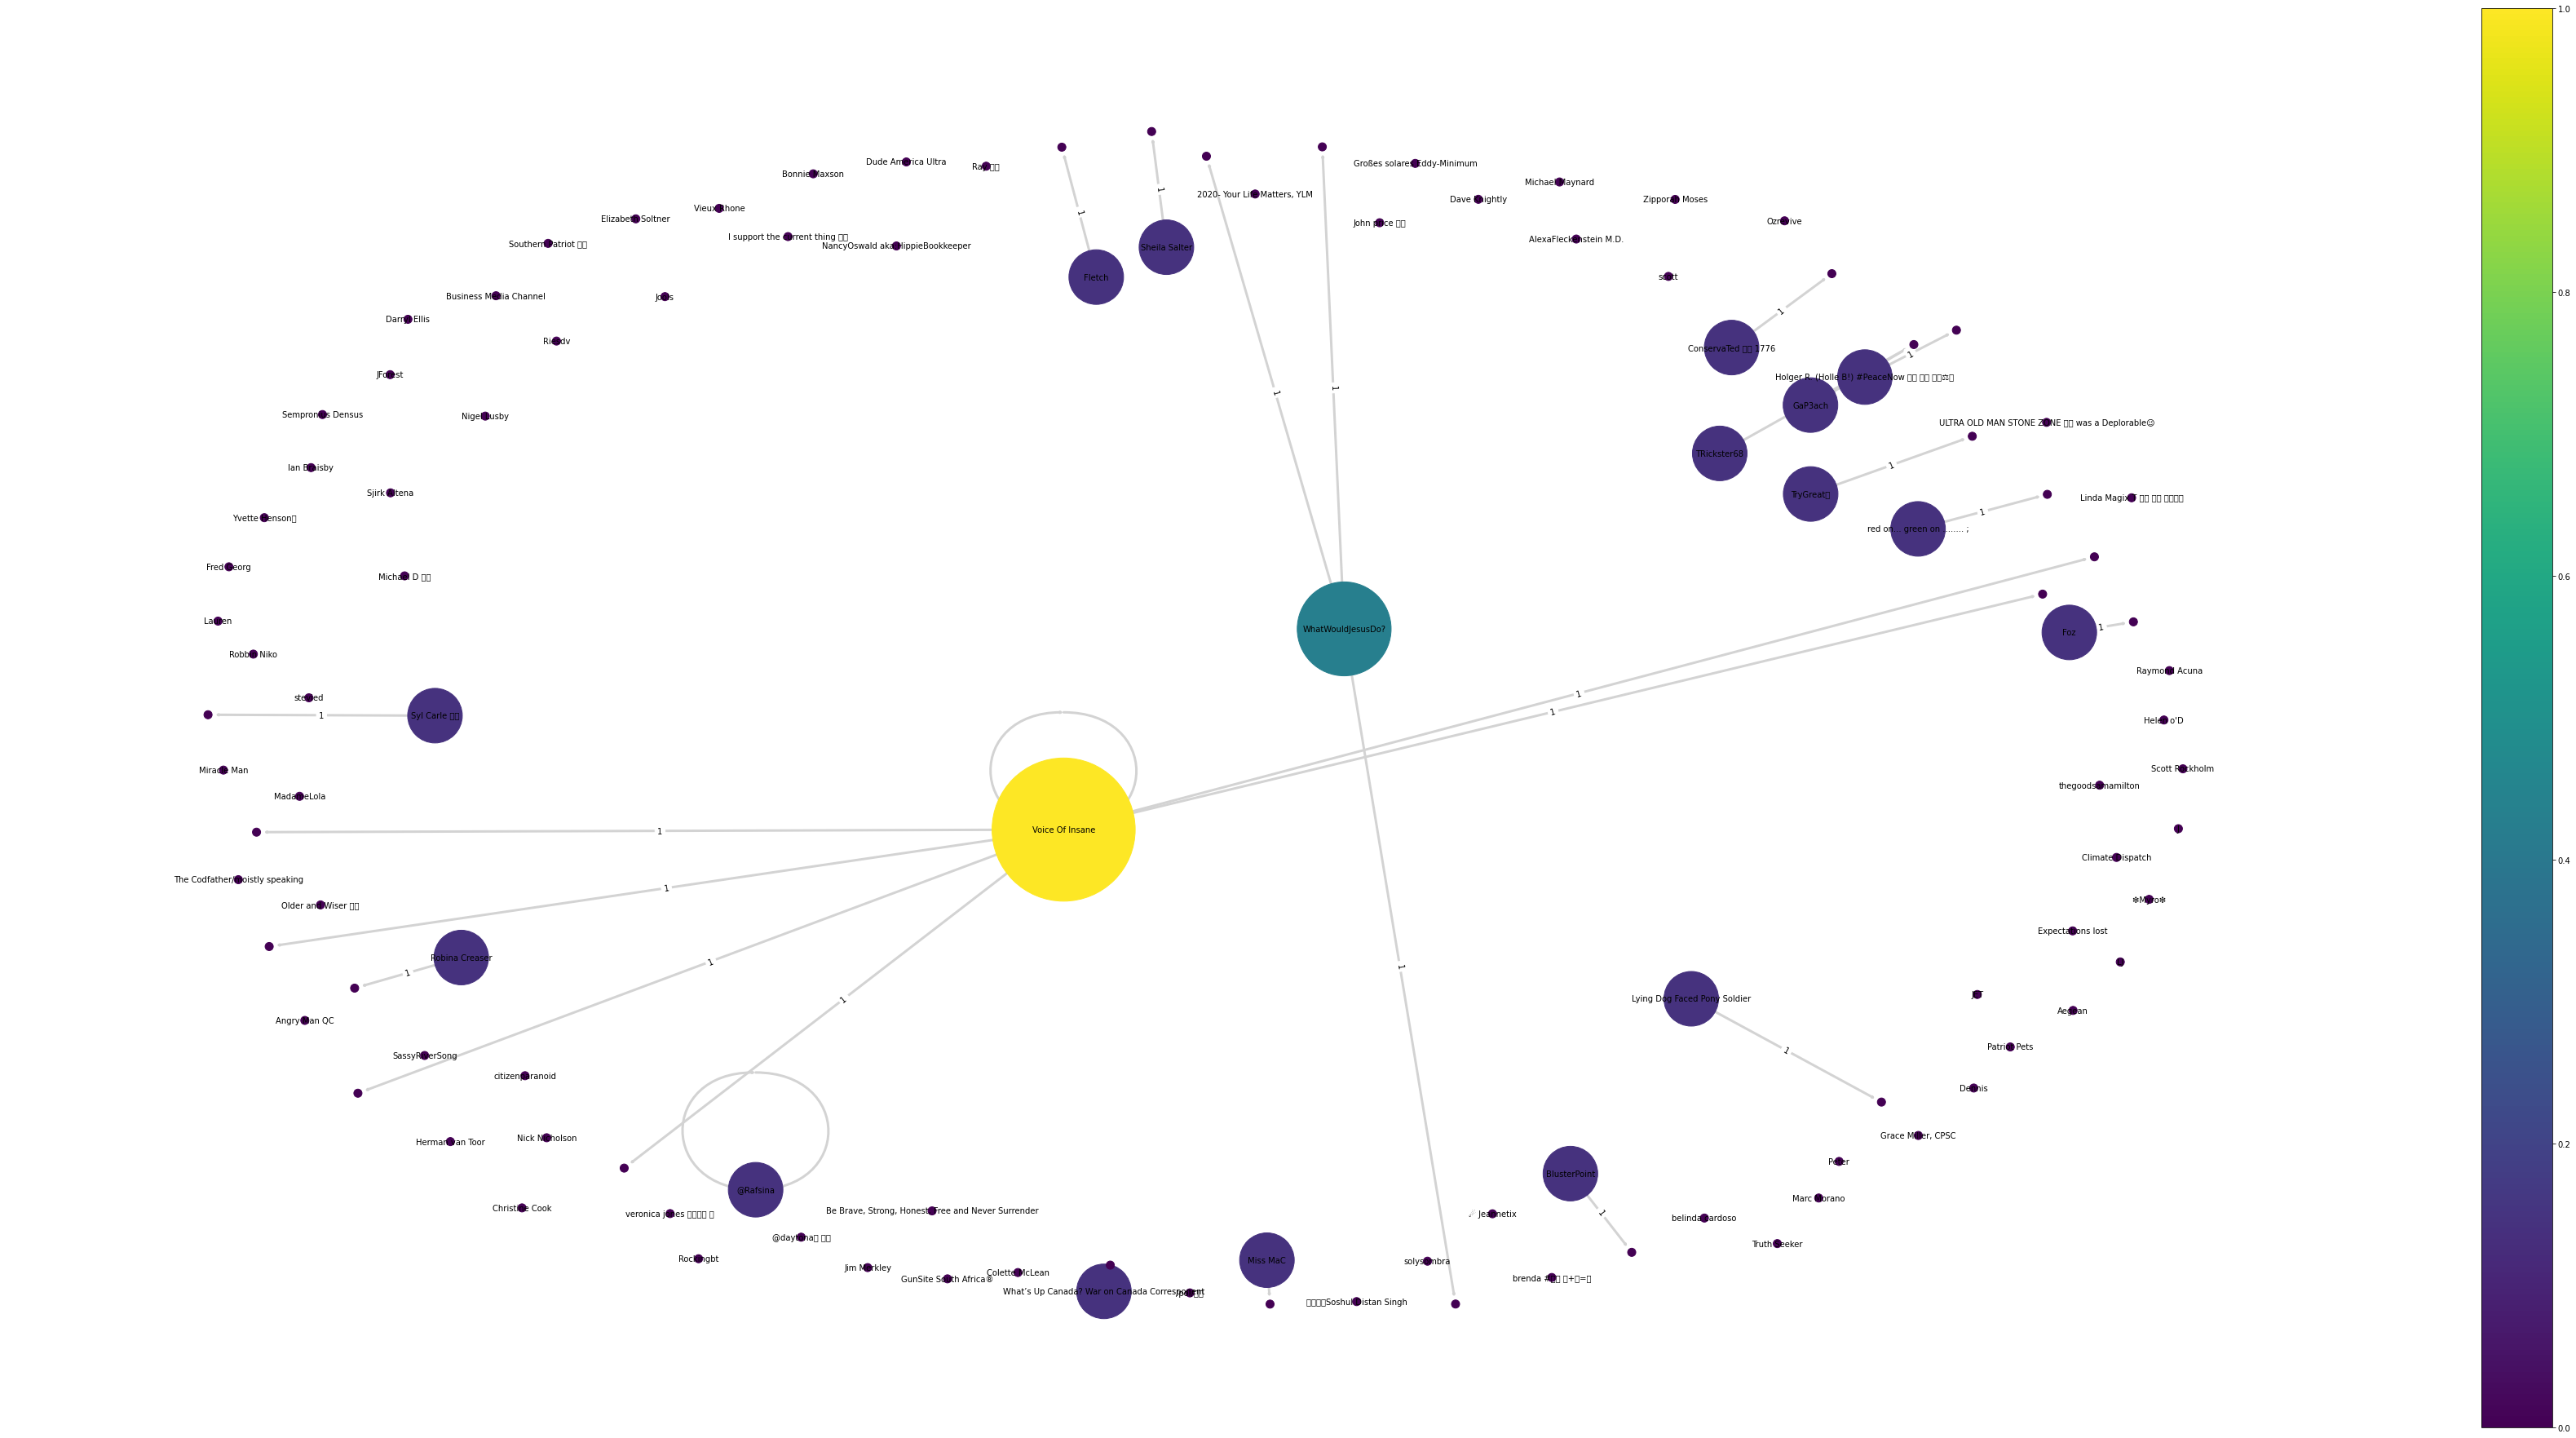

In [34]:
sample_size=100
g, usernames, tweet_texts, df_small = create_network(sample_size, seed=5)
pos = nx.spring_layout(g, seed=77)

centrality = nx.out_degree_centrality(g) #in_degree_centrality
centralities = [v*500000+100 for v in centrality.values()] # convert size of value for the plot

# set the width of edge according to the weight (how many times there was 'reply' relationship between two users)
edgewidth = [g.get_edge_data(u, v)['weight']*3 for u, v in g.edges()] # multiply 3 for the plot

# set size and color of the node according to the modified centrality values
nodes = nx.draw_networkx_nodes(g, pos, node_size=centralities, node_color=centralities)

# set the label of edge according to its weight
edge_labels = nx.get_edge_attributes(g, "weight")

edges = nx.draw_networkx_edges(
    g,
    pos,
    arrowstyle="-|>",
    arrowsize=edgewidth,
    width=edgewidth,
    edge_color='lightgrey',
    #edge_cmap=cmap,
)


# set labels for node (user name) and edge (weight of the edge)
nx.draw_networkx_labels(g, pos, font_size=10, font_family="sans-serif", labels=usernames)
nx.draw_networkx_edge_labels(g, pos, edge_labels)


# plot related features
cmap = plt.cm.viridis
pc = mpl.collections.PatchCollection(edges, cmap=cmap)
plt.colorbar(pc)
plt.gcf().set_size_inches(64, 32) # you can change the size of plot here
ax = plt.gca()
ax.set_axis_off()
plt.savefig(f'network_{sample_size}.jpg')
plt.show()

In [7]:
centrality # to see if the user (id: 867077976210513920  'voice of insane') has the highest out degree centrality
sorted_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1], reverse=True)}

top20 = pd.DataFrame(columns=df_small.columns)
print(top20.columns)
for idx, (author_id, cent_score) in enumerate(sorted_centrality.items()):
    if idx == 20: break
    try:
        #print(f'{idx, usernames[author_id], author_id, cent_score}')
        new_user = df[df.author_id==author_id]
        top20 = pd.concat([top20, new_user])
    except:
        continue
top20

{1093048489355882497: 0.0021769553724148654,
 1.1948045582679613e+18: 0.0,
 3150800516: 0.0,
 1114252239491805184: 0.0,
 867077976210513920: 0.04524957238376613,
 26570595: 0.00015549681231534753,
 17201202.0: 0.0,
 50293935.0: 0.0,
 784826816309501954: 0.0,
 382559030: 0.0,
 624071090: 0.0,
 259960795: 0.0,
 151101551: 0.0,
 1927978586: 0.0,
 455349381: 0.0,
 1097762760014712832: 0.0,
 1031672825373962240: 0.0,
 942146270: 0.0,
 27687202: 0.0,
 2165541865: 0.00015549681231534753,
 39344374.0: 0.0,
 219178854: 0.0006219872492613901,
 14662354.0: 0.0,
 40216315: 0.0,
 1.0907397973861171e+18: 0.0,
 293455806: 0.0015549681231534754,
 254515782.0: 0.0,
 824423012745179136: 0.0009329808738920851,
 140614801.0: 0.0,
 969221534295445506: 0.0009329808738920851,
 9843732: 0.0,
 1073975276843888640: 0.0006219872492613901,
 138203134.0: 0.0,
 871979430: 0.0,
 3111670868: 0.0,
 1356488054: 0.00015549681231534753,
 50393960.0: 0.0,
 153270028: 0.00015549681231534753,
 121240525: 0.0,
 1182419452710

Index(['id', 'text', 'author_id', 'in_reply_to_user_id', 'author',
       'referenced_tweets'],
      dtype='object')


,id,text,author_id,in_reply_to_user_id,author,referenced_tweets
16,1222973621137702913,@DukeMarcude @GeraldKutney Ask him about eatin...,867077976210513920,595410488.0,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122295367211780096..."
24,1222957344281321472,@GZzyzyx @GeraldKutney Dear Genie... 😂 The #cl...,867077976210513920,1210986169824997376.0,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122294906047200460..."
25,1222955581985755138,"@inmyownfashion @GeraldKutney In fact, that is...",867077976210513920,1187495878858293248.0,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122294930097770086..."
26,1222953428772630528,@SNISGeneva @ETH_en WHAT? 😂 😂 😂 you are discus...,867077976210513920,948142675.0,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122295239321162956..."
27,1222953130507239432,@CSRtist Are your fancy eyewear included in th...,867077976210513920,2729372027.0,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122295244357675827..."
...,...,...,...,...,...,...
8043,1213899460465422336,#ipcc #climatehoax #ClimateCrisis https://t.co...,1186677436173316101,NaN,"{""description"":""Climate is not a problem. Forc...","[{""type"":""quoted"",""id"":""1213870244206272513"",""..."
8227,1213542060667498496,"@Tony__Heller Thank you for exposing the ""trut...",1186677436173316101,435704007.0,"{""pinned_tweet_id"":""1528975833968259074"",""veri...","[{""type"":""replied_to"",""id"":""121317805143077273..."
8229,1213536739811217408,"""Meatloaf"" It obviously doesn't take a brain s...",1186677436173316101,NaN,"{""pinned_tweet_id"":""1528975833968259074"",""veri...",NaN
9013,1212467480511139840,@MariaOzLakshmi @SullJack48 Setting rules is s...,1186677436173316101,1386803540.0,"{""name"":""KaveLiveLifeKlimateIsKaotic"",""protect...","[{""type"":""replied_to"",""id"":""121233566375794688..."


In [8]:
rank_names = list()
for col in top20.itertuples(index = False): # iterate through rows of the dataframe
    rank_names.append(json.loads(col.author)['name'])
name_series = pd.Series(rank_names, name='user name')#, ignore_index=True)
top20['username'] = rank_names

In [9]:
reply_to_names = list()
for col in top20.itertuples(index = False): # iterate through rows of the dataframe
    try:
        reply_name = usernames[col.in_reply_to_user_id]
        reply_to_names.append(reply_name)
        print(reply_name)
    except:
        continue
reply_name_series = pd.Series(reply_to_names, name='reply_to_user_name')#, ignore_index=True)
top20['reply_to_user_name'] = reply_name_series

🇨🇦Fringe Minority 🇨🇦
Voice Of Insane
Voice Of Insane
Voice Of Insane
John Smith 🗽 Who held Keir's beer?
Matthew Petryszak 🇺🇸
King Arthur & Excalibur
Voice Of Insane
⭐⭐⭐🍁👀 À la gang nous savons tout 👀🍁
James Gates, A Canadian Tax Payer not a citizen
🐀💧Lee ‘Woke Capital City Greenie’ Murray🔥🌏🆘
King Arthur & Excalibur
King Arthur & Excalibur
Voice Of Insane
King Arthur & Excalibur
George Sawision ME
King Arthur & Excalibur
King Arthur & Excalibur
Matthew Petryszak 🇺🇸
Trent Ferguson
Pierre Therrien
Voice Of Insane
Pierre Therrien
Pierre Therrien
Voice Of Insane
Trent Ferguson
Trent Ferguson
King Arthur & Excalibur
Voice Of Insane
Voice Of Insane
Pierre Therrien
Voice Of Insane
Matthew Petryszak 🇺🇸
King Arthur & Excalibur
King Arthur & Excalibur
#444
Rog Tallbloke 🇬🇧
Tom Nelson
David I Birch
Just a PRESIDENT ELECT who wants to menstruate
David I Birch
Lila
Just a PRESIDENT ELECT who wants to menstruate
Jan Summers…Let Us Be…🌸🍷🍷🍷🌸
Just a PRESIDENT ELECT who wants to menstruate
Dr Joe
REC
hum

In [ ]:
top20.to_csv('top20_users.csv')

In [ ]:
set(top20.username)

In [13]:
simplified = top20.copy()
simplified.text

16      @DukeMarcude @GeraldKutney Ask him about eatin...
24      @GZzyzyx @GeraldKutney Dear Genie... 😂 The #cl...
25      @inmyownfashion @GeraldKutney In fact, that is...
26      @SNISGeneva @ETH_en WHAT? 😂 😂 😂 you are discus...
27      @CSRtist Are your fancy eyewear included in th...
                              ...                        
8043    #ipcc #climatehoax #ClimateCrisis https://t.co...
8227    @Tony__Heller Thank you for exposing the "trut...
8229    "Meatloaf" It obviously doesn't take a brain s...
9013    @MariaOzLakshmi @SullJack48 Setting rules is s...
9071    #ctvnews Where did you dig up #BlairFeltmate ?...
Name: text, Length: 1030, dtype: object

<AxesSubplot:xlabel='username'>

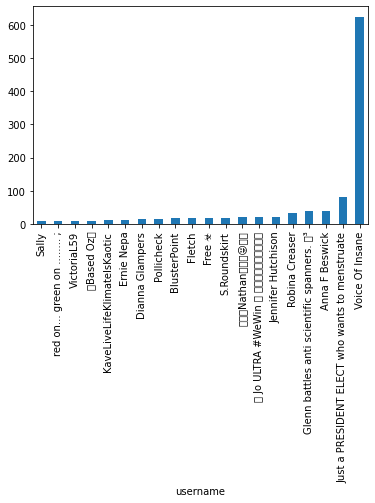

In [28]:
counted = simplified.groupby('username', sort=True).count()
counted.id.sort_values().plot.bar()

In [18]:
simplified

,id,text,author_id,in_reply_to_user_id,author,referenced_tweets,username,reply_to_user_name
16,1222973621137702913,@DukeMarcude @GeraldKutney Ask him about eatin...,867077976210513920,595410488.0,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122295367211780096...",Voice Of Insane,King Arthur & Excalibur
24,1222957344281321472,@GZzyzyx @GeraldKutney Dear Genie... 😂 The #cl...,867077976210513920,1210986169824997376.0,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122294906047200460...",Voice Of Insane,Voice Of Insane
25,1222955581985755138,"@inmyownfashion @GeraldKutney In fact, that is...",867077976210513920,1187495878858293248.0,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122294930097770086...",Voice Of Insane,Trent Ferguson
26,1222953428772630528,@SNISGeneva @ETH_en WHAT? 😂 😂 😂 you are discus...,867077976210513920,948142675.0,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122295239321162956...",Voice Of Insane,Trent Ferguson
27,1222953130507239432,@CSRtist Are your fancy eyewear included in th...,867077976210513920,2729372027.0,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122295244357675827...",Voice Of Insane,King Arthur & Excalibur
...,...,...,...,...,...,...,...,...
8043,1213899460465422336,#ipcc #climatehoax #ClimateCrisis https://t.co...,1186677436173316101,NaN,"{""description"":""Climate is not a problem. Forc...","[{""type"":""quoted"",""id"":""1213870244206272513"",""...",KaveLiveLifeKlimateIsKaotic,NaN
8227,1213542060667498496,"@Tony__Heller Thank you for exposing the ""trut...",1186677436173316101,435704007.0,"{""pinned_tweet_id"":""1528975833968259074"",""veri...","[{""type"":""replied_to"",""id"":""121317805143077273...",KaveLiveLifeKlimateIsKaotic,NaN
8229,1213536739811217408,"""Meatloaf"" It obviously doesn't take a brain s...",1186677436173316101,NaN,"{""pinned_tweet_id"":""1528975833968259074"",""veri...",NaN,KaveLiveLifeKlimateIsKaotic,NaN
9013,1212467480511139840,@MariaOzLakshmi @SullJack48 Setting rules is s...,1186677436173316101,1386803540.0,"{""name"":""KaveLiveLifeKlimateIsKaotic"",""protect...","[{""type"":""replied_to"",""id"":""121233566375794688...",KaveLiveLifeKlimateIsKaotic,NaN


In [29]:
with pd.option_context('display.max_rows', 2000,
                       'display.max_columns', None,
                       'display.width', 2000,
                       'display.precision', 3,
                       'display.colheader_justify', 'left',
                      'display.max_colwidth', 1000):
    
    df[df.author_id==867077976210513920].text # looking at the user 'voice of insane'

16                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      @DukeMarcude @GeraldKutney Ask him about eating meat 🥩and the agricultural industry? There the SCIENCE he accepts 😂 😂 😂 #climatebrawl #climatechange #CLIMATEHOAX
24                                                            

In [ ]:
pd.options.display.max_colwidth = 1000
df[df.author_id==867077976210513920].text # looking at the user 'voice of insane'